<a href="https://colab.research.google.com/github/SithmiDesilva/Customer-Churn-Prediction/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_recall_curve, average_precision_score,roc_curve, auc,precision_score, recall_score, f1_score
import pickle



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Load and Explore the dataset**

In [ ]:
#Load the csv data for pandas dataframe
data=pd.read_csv('/content/drive/MyDrive/Circles_Assignment/problem_1/customer_churn.csv')

In [ ]:
#Display nn. of rows and coulmns of the dataset
data.shape

(7043, 21)

In [ ]:
 # avoid data truncate (missing columns while displaying the dataset)
data.head()
pd.set_option('display.max_columns', None)

In [ ]:
#Display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Print unique values in each column

numerical_features=data.select_dtypes(include=['int64','float64']).columns
categorical_features=data.select_dtypes(include=['object']).columns

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n {unique_values}")
    print('\n')

Unique values in column 'customerID':
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique values in column 'gender':
 ['Female' 'Male']


Unique values in column 'SeniorCitizen':
 [0 1]


Unique values in column 'Partner':
 ['Yes' 'No']


Unique values in column 'Dependents':
 ['No' 'Yes']


Unique values in column 'tenure':
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Unique values in column 'PhoneService':
 ['No' 'Yes']


Unique values in column 'MultipleLines':
 ['No phone service' 'No' 'Yes']


Unique values in column 'InternetService':
 ['DSL' 'Fiber optic' 'No']


Unique values in column 'OnlineSecurity':
 ['No' 'Yes' 'No internet service']


Unique values in column 'OnlineBackup':
 ['Yes' 'No' 'No internet service']


Unique values in column 'DeviceProtectio

In [ ]:
#Check the missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Display the rows with missing values
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


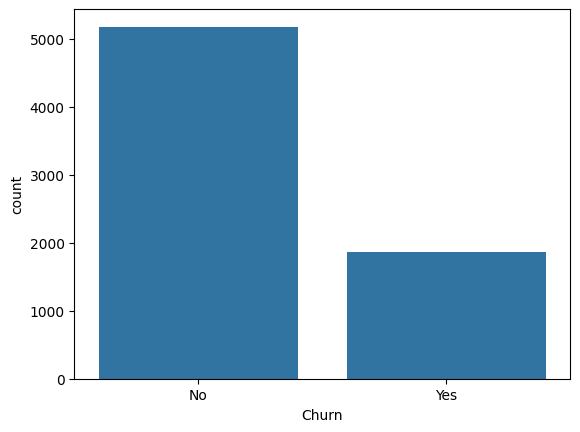

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
#check the distribution of the target column
sns.countplot(x='Churn', data=data)
plt.show()
print(data['Churn'].value_counts())

## **2. Exploraitory Data Analysis**

In [ ]:
#List of features in the dataset
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Statistical description for numerical data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### **2.1 Numerical Feature Analysis**

In [ ]:
#Understand the distribution of the numerical features

def plot_histograms(data, column_name):
    for col in column_name:
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(data[col], kde=True) # Assign the plot to ax
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        #calculate the mean and the median values for the columns
        col_mean = data[col].mean()
        col_median = data[col].median()
        print(f"Mean value of {col}: {col_mean}")
        print(f"Median value of {col}: {col_median}")

        # add vertical lines for mean and median using ax.axvline
        ax.axvline(col_mean, color='red', linestyle='--', label='Mean')
        ax.axvline(col_median, color='green', linestyle='--', label='Median')

        plt.legend()

        plt.show()

Mean value of tenure: 32.37114865824223
Median value of tenure: 29.0


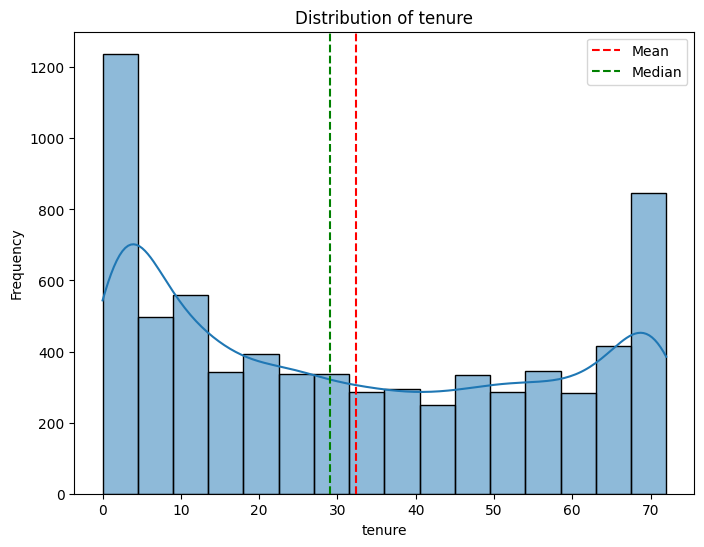

In [ ]:
#Distribution of tenure
plot_histograms(data, ['tenure'])

Mean value of MonthlyCharges: 64.76169246059918
Median value of MonthlyCharges: 70.35


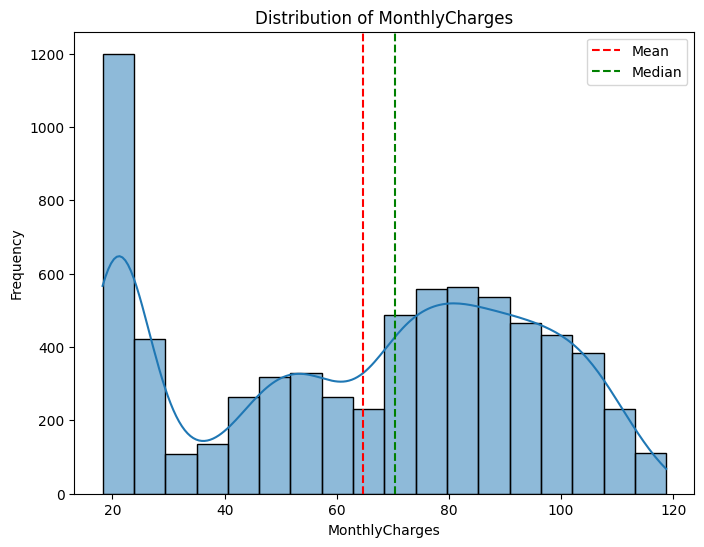

In [ ]:
#Distribution of Monthly Charges
plot_histograms(data, ['MonthlyCharges'])

Mean value of TotalCharges: 2283.3004408418656
Median value of TotalCharges: 1397.475


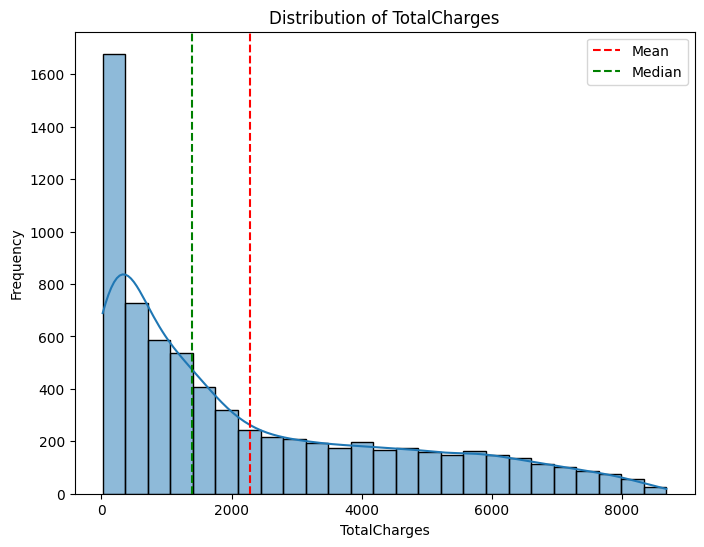

In [ ]:
#Distribution of Total Charges
plot_histograms(data, ['TotalCharges'])

In [ ]:
#Plot boxplots to identify outliers
def plot_boxplots(data, column_name):
    for col in column_name:
        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Value')
        plt.show()


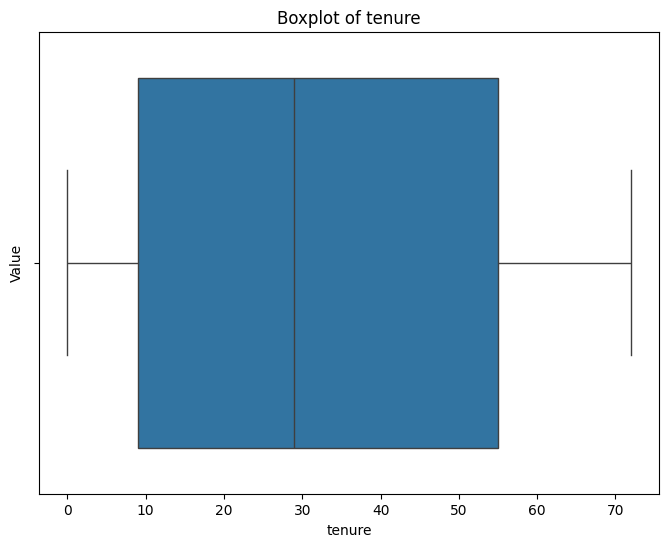

In [ ]:
#Boxplot of Tenure
plot_boxplots(data,['tenure'])

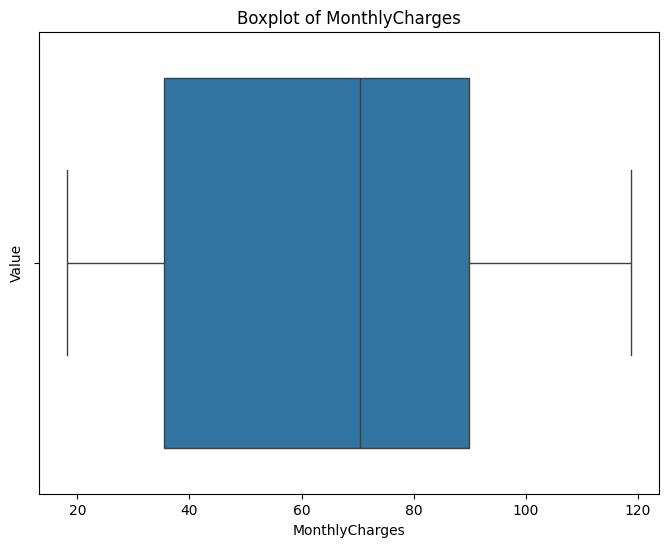

In [ ]:
#Boxplot of Monthly Charges
plot_boxplots(data,['MonthlyCharges'])

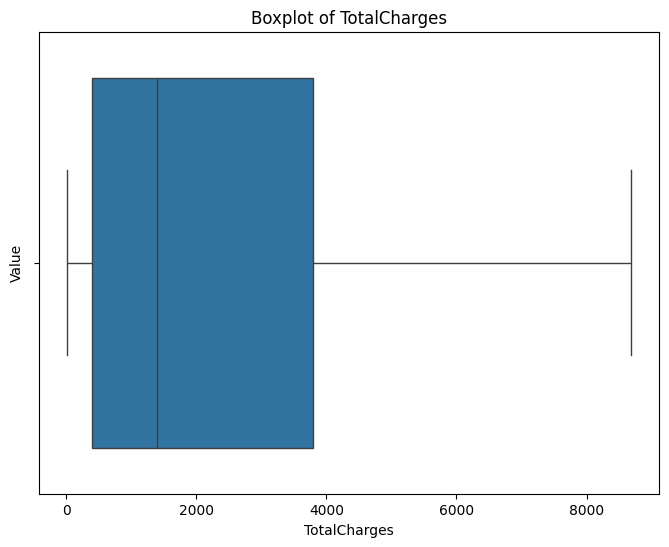

In [ ]:
#Boxplot of Total charges
plot_boxplots(data,['TotalCharges'])

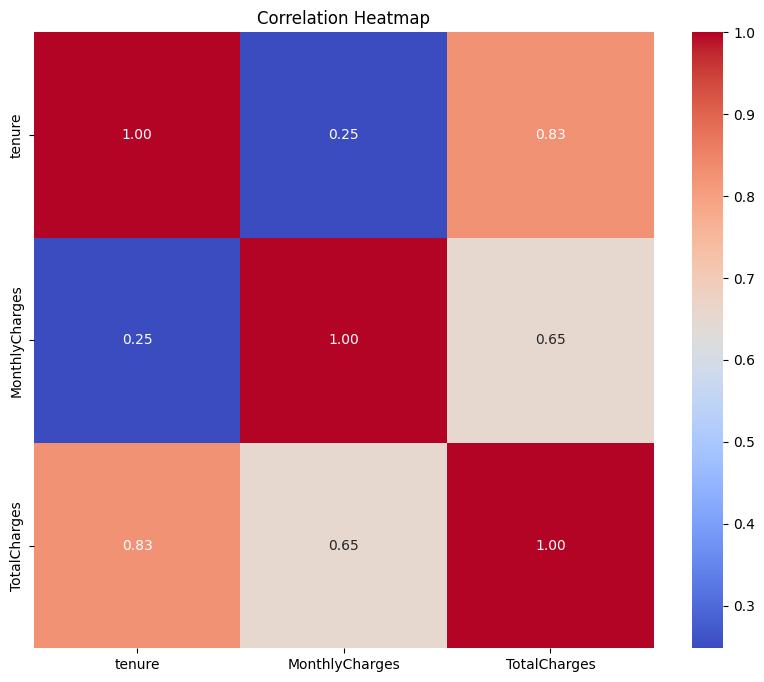

In [ ]:
#Correlation matrix heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **2.2 Categorical Feature Analysis**

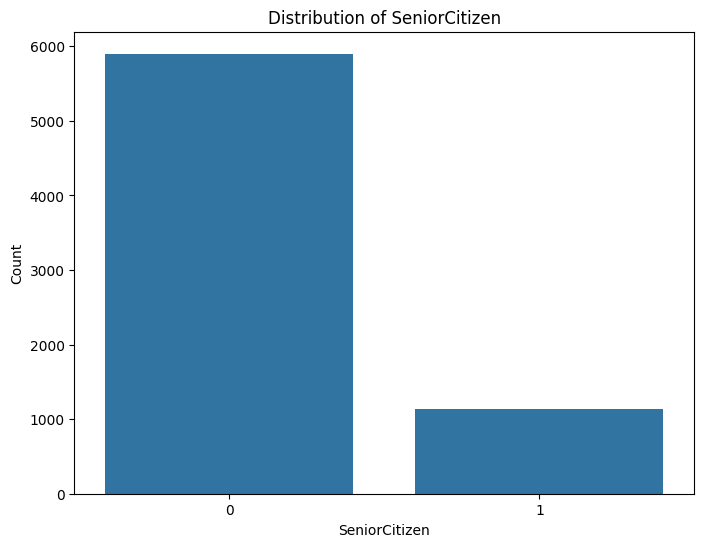

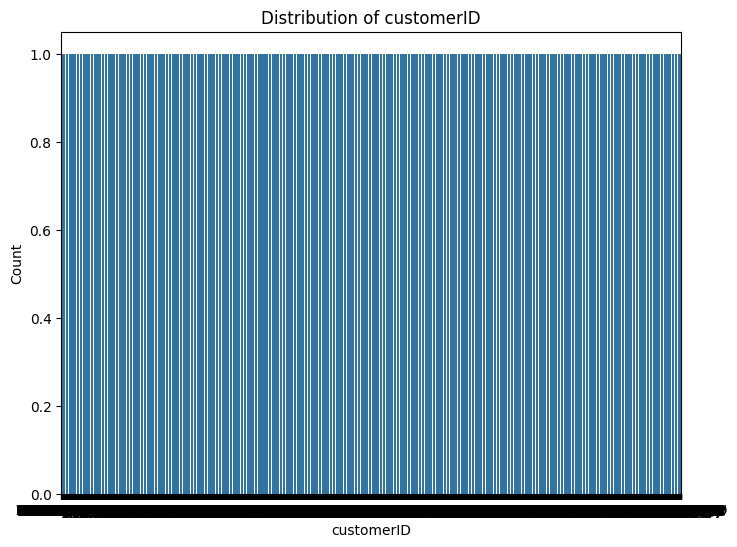

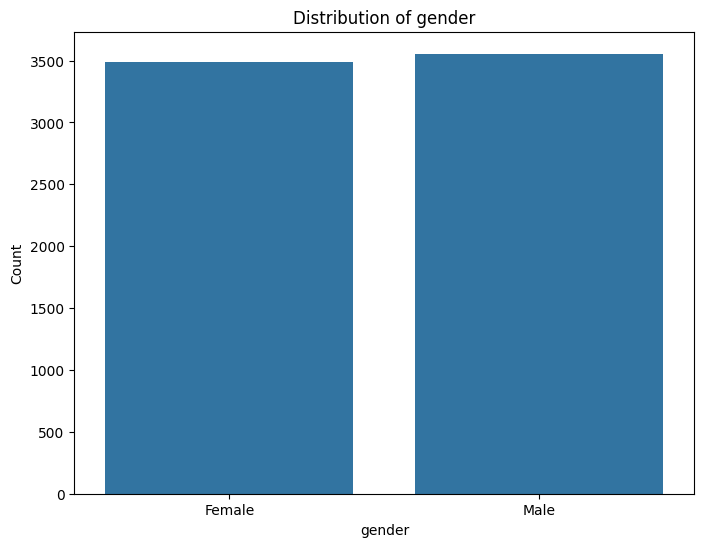

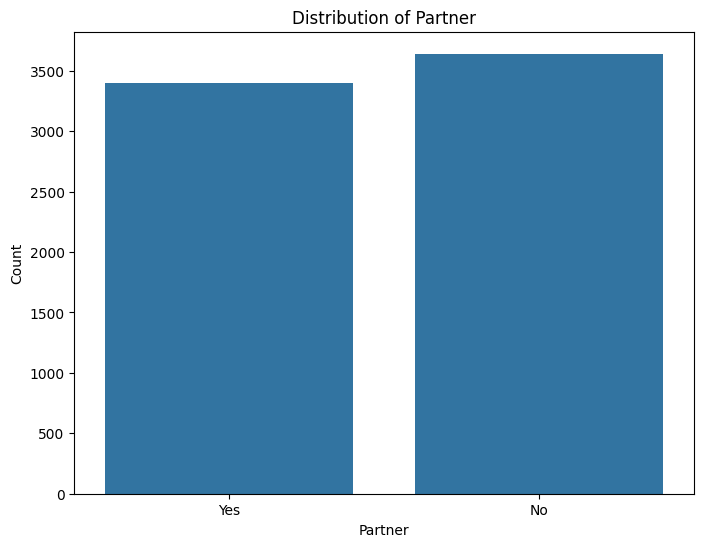

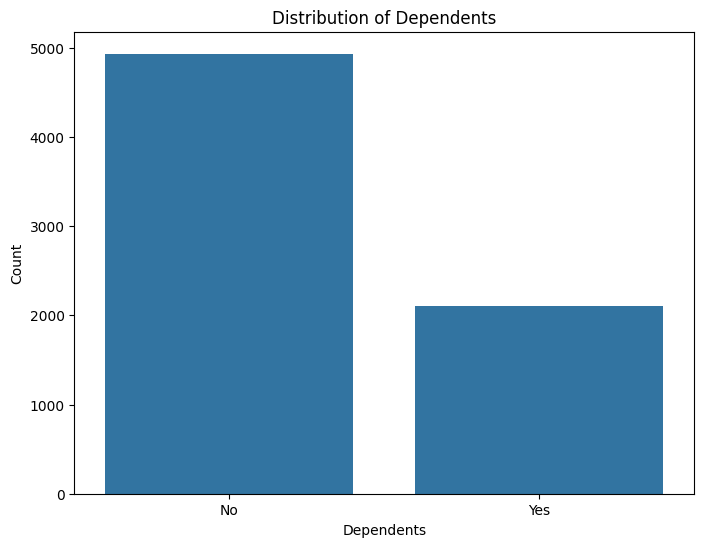

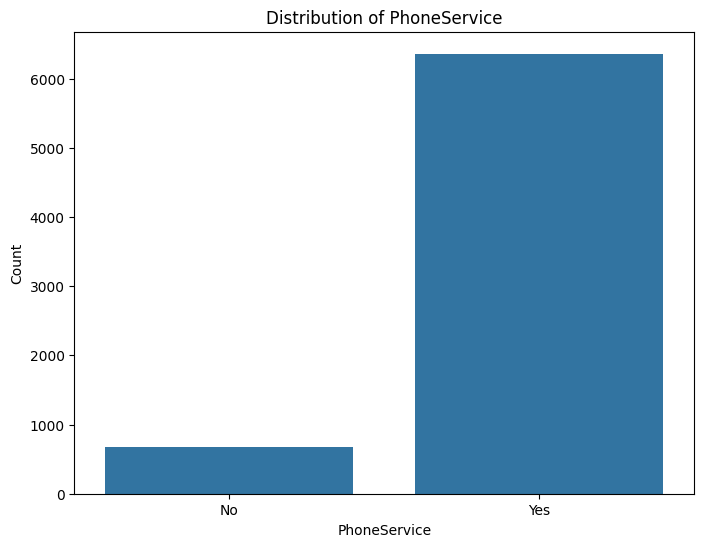

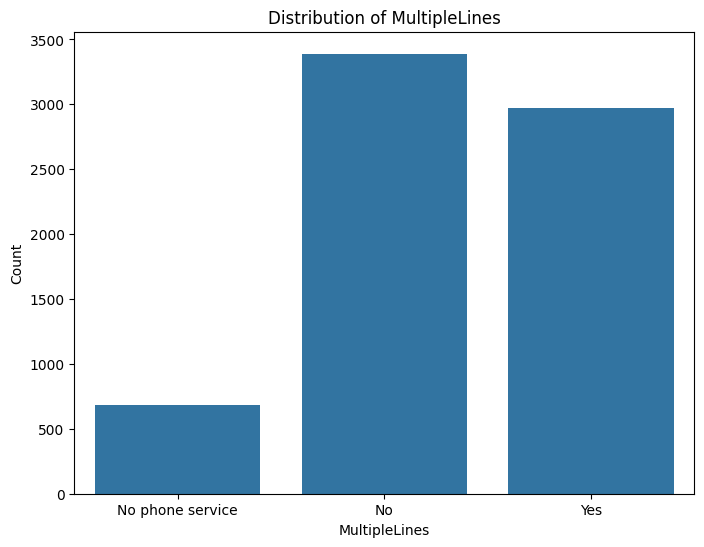

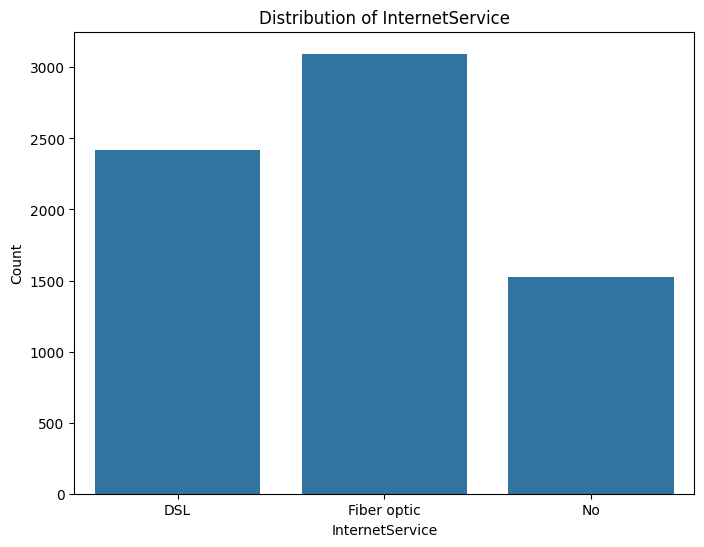

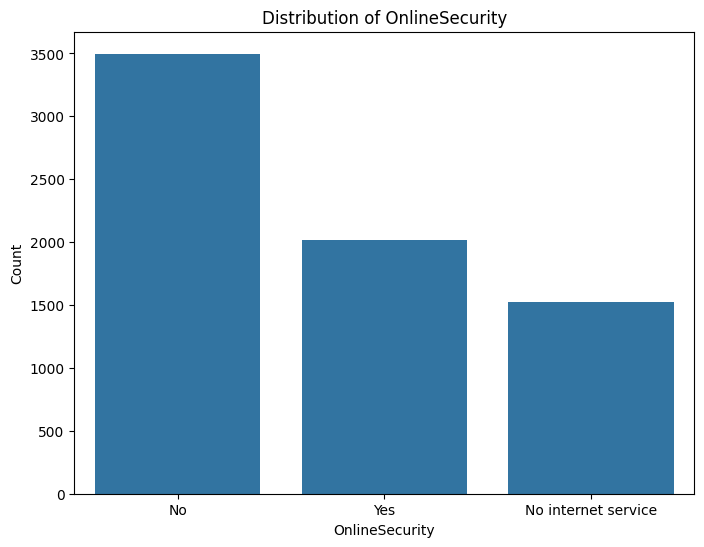

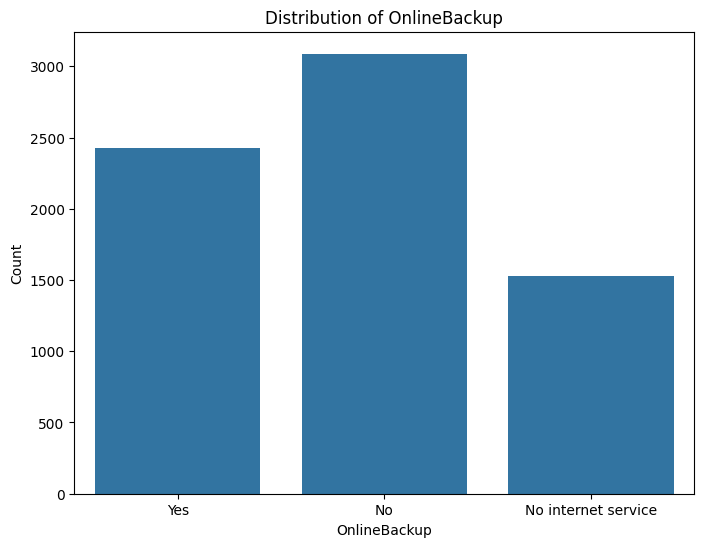

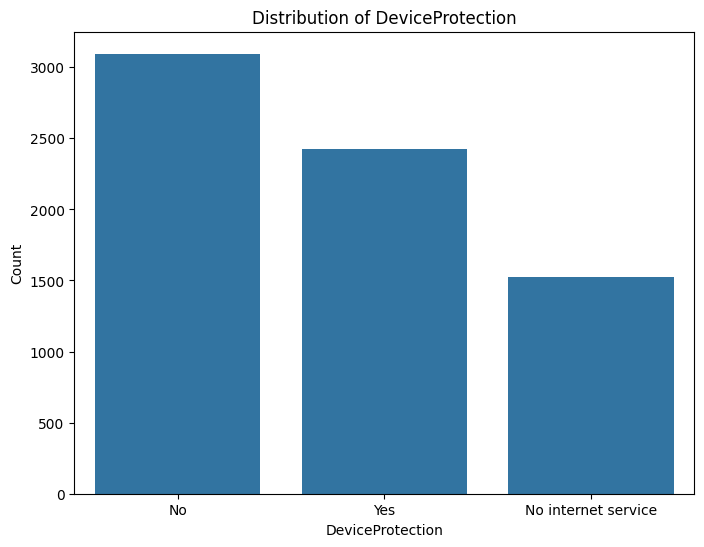

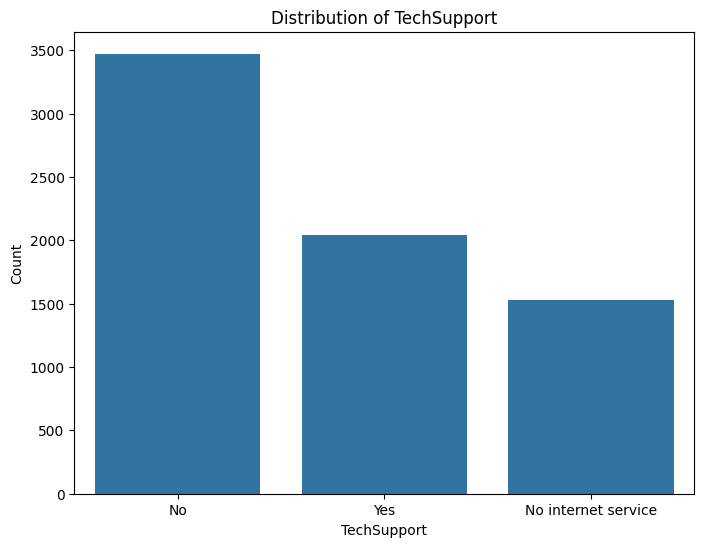

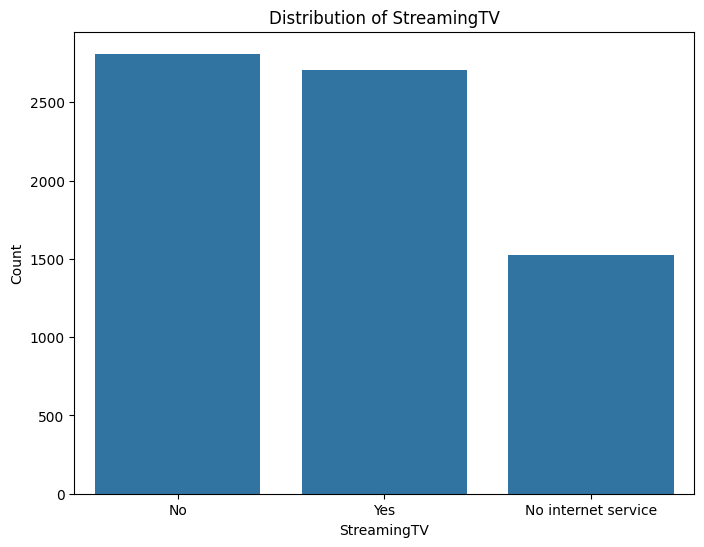

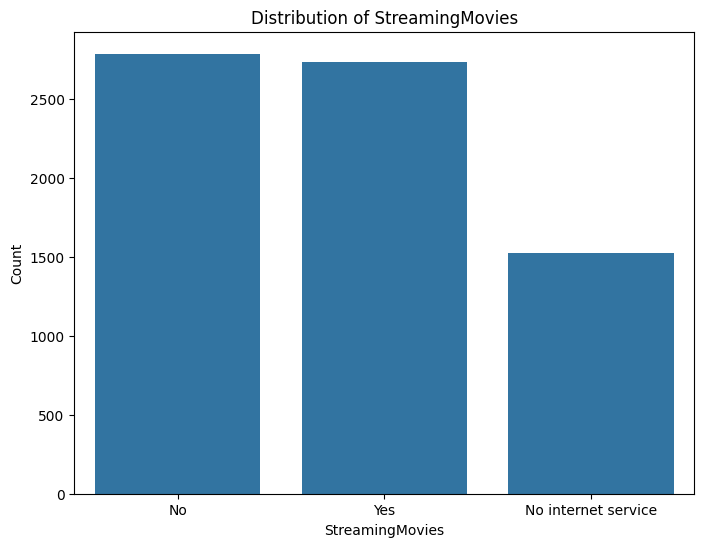

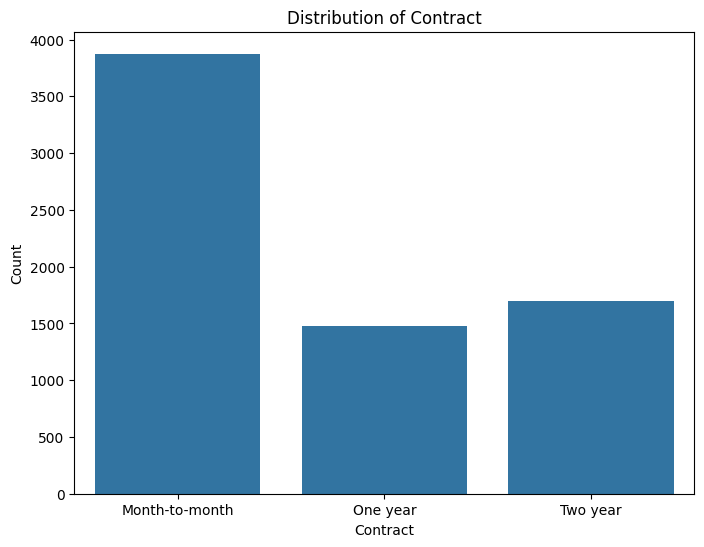

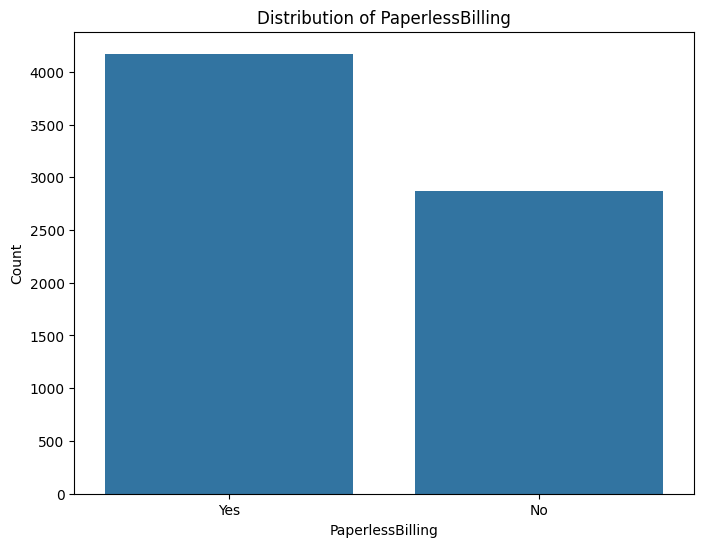

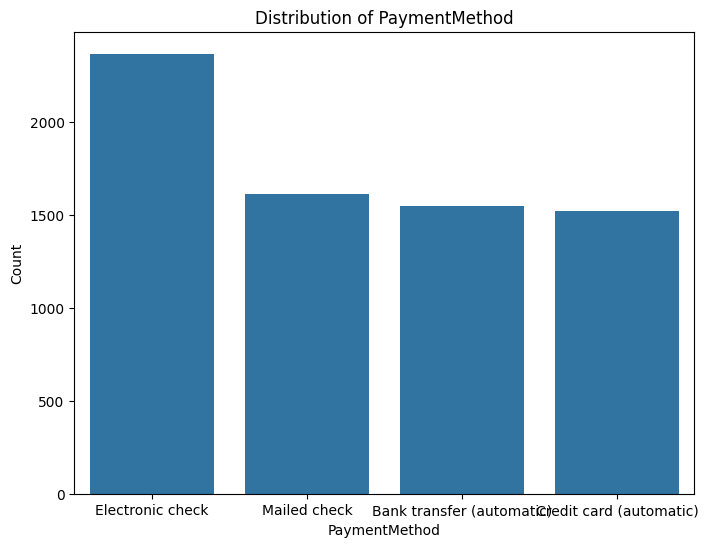

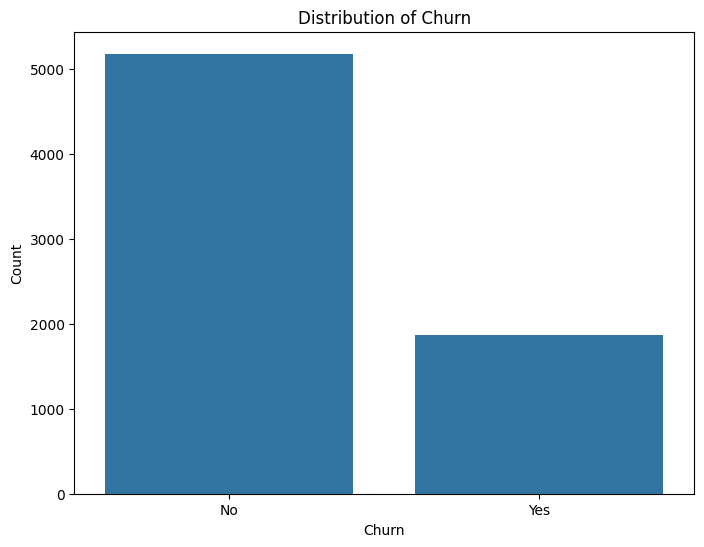

In [ ]:
#Understand the distribution of the categorical features
categorical_columns=data.select_dtypes(include=['object']).columns.to_list()
categorical_columns=['SeniorCitizen']+ categorical_columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## **3. Data Preprocessing**

### **3.1 Feature Transformation**

In [ ]:
#Drop customer ID column as it is not required for modelling
data = data.drop(columns=['customerID'])
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
#Check the volume of the dataset
data.shape

(7043, 20)

In [ ]:
#Replace missing values in total charges into 0 cuz all instances with 0 tenure leads to null total charges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0.0)

In [ ]:
#Check null values to confirm
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Filter the DataFrame
filtered_data= data[(data['TotalCharges'] == 0) & (data['tenure'] == 0)].index

In [ ]:
# Restore null values in those specific rows of the original dataset
data.loc[filtered_data, 'TotalCharges'] = data.loc[filtered_data, 'TotalCharges']
row_index = 753
data.loc[row_index]

,753
gender,Male
SeniorCitizen,0
Partner,No
Dependents,Yes
tenure,0
PhoneService,Yes
MultipleLines,No
InternetService,No
OnlineSecurity,No internet service
OnlineBackup,No internet service


### **3.2 Encode Categorical Data**

In [ ]:
#Label encoding of target column
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
data.head(3)

<ipython-input-29-2780894d7123>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
#Label encoding of categorical features
categorical_columns=data.select_dtypes(include=['object']).columns.to_list()
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
#Initialize a dictionary to save the encoders
encoders ={}

#Apply label encoding and store the encoders
for col in categorical_columns:
    encoder=LabelEncoder()
    data[col]=encoder.fit_transform(data[col])
    encoders[col]=encoder

data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [ ]:
#save the encoders to a pickle file
file_path='/content/drive/MyDrive/Circles_Assignment/problem_1/encoders.pkl'

with open(file_path,'wb') as f:
    pickle.dump(encoders,f)

print(f"Encoders saved to: {file_path}")

Encoders saved to: /content/drive/MyDrive/Circles_Assignment/problem_1/encoders.pkl


### **3.3 Standardize Numerical Data**

In [ ]:
#Apply statndard scaler to numerical columns

scaler=StandardScaler()
data[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])
data.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0


In [ ]:
#save it in a pickle file in drive

file_path='/content/drive/MyDrive/Circles_Assignment/problem_1/standard_scaler.pkl'
with open(file_path,'wb') as f:
    pickle.dump(scaler,f)

### **3.4 Split the Data**

In [ ]:
# split the dataset to training and test data
x=data.drop(columns=['Churn'])
y=data['Churn']
print('Columns without the Target:\n')
display(x.head(5))

Columns without the Target:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874


In [ ]:
print('Target column:\n')
display(y.head(5))

Target column:



,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y) # test size is 30%

In [ ]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (4930, 19)
x_test : (2113, 19)
y_train : (4930,)
y_test : (2113,)


In [ ]:
#Check the data available in training data
print(y_train.value_counts())

Churn
0    3622
1    1308
Name: count, dtype: int64


### **3.5 Balance Training Data**

In [ ]:
#Initialize SMOTE to address data imbalance in training data
smote=SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print('Shape of the data:',y_train_resampled.shape,'\n')
print('Balanced data:\n',y_train_resampled.value_counts())

Shape of the data: (7244,) 

Balanced data:
 Churn
0    3622
1    3622
Name: count, dtype: int64


# **4. Model Training**

### **4.1 LightGBM Model**

In [ ]:
#Define the base LightGBM model with safe defaults
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    boosting_type='gbdt',
    objective='binary',
    min_child_samples=30,
    min_split_gain=0.1
)

#Define a smaller, focused hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [20, 31],
    'min_child_samples': [20, 30],
    'min_split_gain': [0.1, 0.5],
    'reg_alpha': [0.0, 0.1],
    'reg_lambda': [0.0, 0.1]
}

#Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=30,   # Number of random combinations to try
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

#Fit the model
random_search.fit(x_train_resampled, y_train_resampled)

#Best model and predictions
best_lgb_model = random_search.best_estimator_
y_pred = best_lgb_model.predict(x_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
#Evaluation
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1552
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113

LightGBM Accuracy: 0.7524846190250828


In [ ]:
#Overfitting check
train_predictions = best_lgb_model.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Difference (Overfitting): {train_accuracy - accuracy_score(y_test, y_pred):.4f}")


Training Accuracy: 0.8422142462727775
Validation Accuracy: 0.7524846190250828
Difference (Overfitting): 0.0897


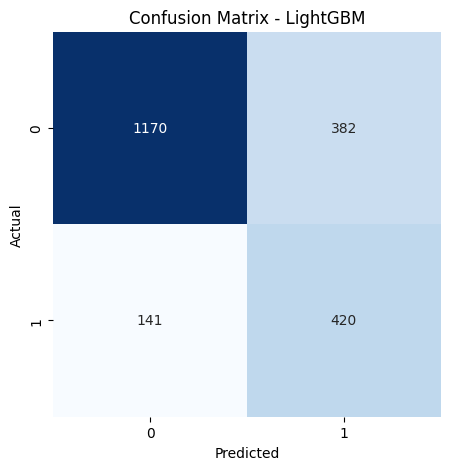

In [ ]:
#Calculate the confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

### **4.2 Random Forest Model**

In [ ]:
#Define the parameter distribution
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

#Instantiate the base model
rf = RandomForestClassifier(random_state=42)

#Set up RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#Fit the randomized search
random_rf.fit(x_train_resampled, y_train_resampled)

#Best model and CV evaluation
print("Best Parameters for Random Forest:", random_rf.best_params_)
best_rf = random_rf.best_estimator_

cv_score_rf = cross_val_score(best_rf, x_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Random Forest CV F1 Score:", cv_score_rf.mean())


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
Random Forest CV F1 Score: 0.8234736518641667


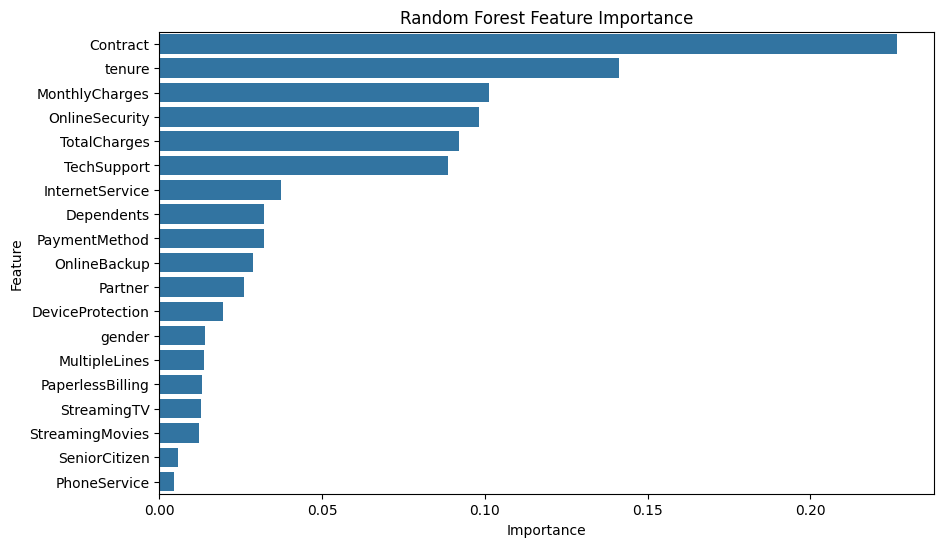

In [ ]:
#Feature importance for the best performing model
feature_importance = best_rf.feature_importances_
feature_names = x_train_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
#classification report
y_pred_rf = best_rf.predict(x_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1552
           1       0.54      0.76      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



In [ ]:
#Calculate the overfitting
train_predictions = best_rf.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_predictions)

val_predictions = best_rf.predict(x_test)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Difference of Training and Testing data:{train_accuracy-val_accuracy:.4f}")

Training Accuracy: 0.8686
Validation Accuracy: 0.7653
Difference of Training and Testing data:0.1033


In [ ]:
#Save the random forest model into a pickle file
model_data={'model':best_rf,'feature_names':x.columns.tolist()}
file_path='/content/drive/MyDrive/Circles_Assignment/problem_1/rf_model.pkl'
with open(file_path,'wb') as f:
    pickle.dump(model_data,f)

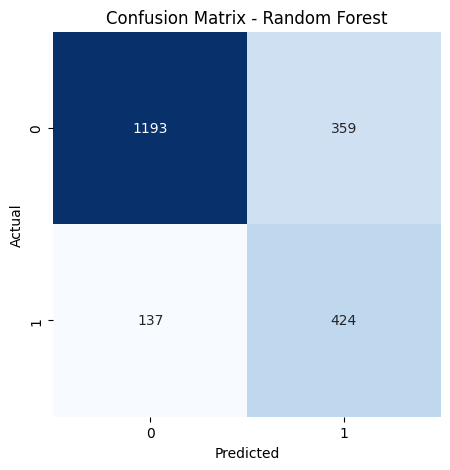

In [ ]:
#Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# **5. Model Evaluation**

### **5.1 ROC-AUC Curve**

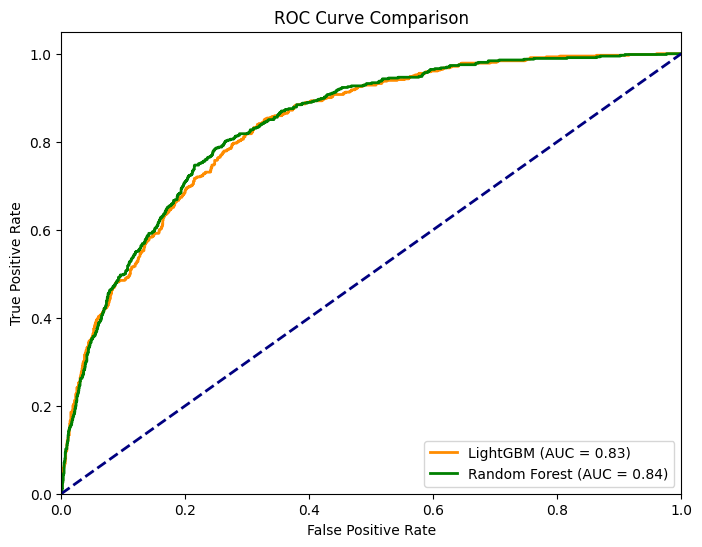

In [ ]:
#Calculate ROC curve and AUC for LightGBM
y_pred_prob_lgb = best_lgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgb)
roc_auc = auc(fpr, tpr)

# Calculate ROC curve and AUC for Random Forest
y_pred_prob_rf = best_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LightGBM (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

### **5.2 Precision-Recall Curve**

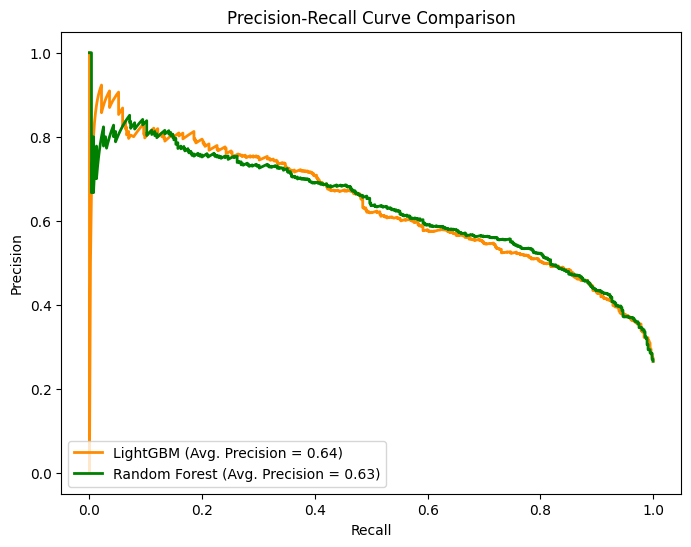

In [ ]:
# Calculate predicted probabilities for LightGBM
y_pred_prob_lgb = best_lgb_model.predict_proba(x_test)[:, 1]

# Calculate predicted probabilities for Random Forest
y_pred_prob_rf = best_rf.predict_proba(x_test)[:, 1]

# Calculate precision-recall curve for LightGBM
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_prob_lgb)
avg_precision_lgb = average_precision_score(y_test, y_pred_prob_lgb)

# Calculate precision-recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
avg_precision_rf = average_precision_score(y_test, y_pred_prob_rf)

# Plot the curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lgb, precision_lgb, color='darkorange', lw=2,
         label=f'LightGBM (Avg. Precision = {avg_precision_lgb:.2f})')
plt.plot(recall_rf, precision_rf, color='green', lw=2,
         label=f'Random Forest (Avg. Precision = {avg_precision_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

### **5.3 Overall Model Performance Comparison**

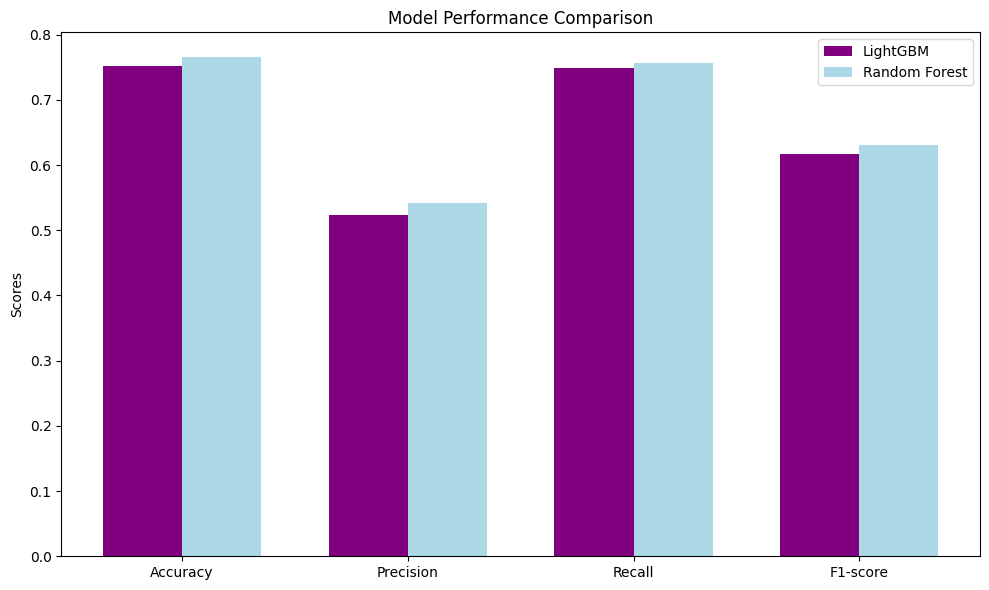

In [ ]:
# Calculate metrics for LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred)
precision_lgb = precision_score(y_test, y_pred)
recall_lgb = recall_score(y_test, y_pred)
f1_lgb = f1_score(y_test, y_pred)

# Similarly, calculate these for Random Forest (replace y_pred with RF predictions)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_scores = [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='purple')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

# **6. Predictive Analysis**

In [ ]:
#Load the trained model
file_path = '/content/drive/MyDrive/Circles_Assignment/problem_1/rf_model.pkl'
with open(file_path, 'rb') as f:
    rf_model = pickle.load(f)

#Load the saved encoders
encoders_path = '/content/drive/MyDrive/Circles_Assignment/problem_1/encoders.pkl'
with open(encoders_path, 'rb') as f:
    encoders = pickle.load(f)

#Load the saved standard scalers
scaler_path = '/content/drive/MyDrive/Circles_Assignment/problem_1/standard_scaler.pkl'
with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)

#Display the imported model
print(rf_model)

{'model': RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42), 'feature_names': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']}


In [ ]:
# Create a DataFrame with the customer data
customer_data = {
   'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['No'],
    'Dependents': ['No'],
    'tenure': [2],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [70.70],
    'TotalCharges': [151.65]
}
customer_df = pd.DataFrame(customer_data)

# Preprocess the customer data
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

# Encode categorical features
for col in categorical_features:
    customer_df[col] = encoders[col].transform(customer_df[col])

# Scale numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_df[numerical_features] = scaler.transform(customer_df[numerical_features])

# Ensure column order matches training
customer_df = customer_df[rf_model['feature_names']]

# Make prediction
prediction = rf_model['model'].predict(customer_df)

# Output
if prediction[0] == 1:
    print("The customer is predicted to churn.")
else:
    print("The customer is predicted to not churn.")


The customer is predicted to churn.


### **Assumptions**

*  All missing TotalCharges values are assumed to result from customers who have just joined
* Assumes that interpolated data points generated via SMOTE are representative of realistic churn behavior
*   Assumes stratification by target variable (Churn) ensures fair representation across splits.

### **Limitations**

* LabelEncoder may impose ordinal relationships on non-ordinal features, which may mislead some algorithms.
* Even with SMOTE, class imbalance can still affect model generalization on unseen data.
* The dataset lacks historical behavior, usage trends, or interaction logs over time that could improve churn prediction.

### **Next Steps**

* Enhance feature engineering by introducing new features like Average monthly spend, Interaction terms
* Try additional models like CatBoost, XGBoost, or Logistic Regression with L1 regularization for improved interpretability and performance
* Use SHAP to better interpret model predictions for individual customers.


